SIFT - Scale-Invariant Feature Transform - Part 2
=======================

In the last notebook I went through the process of creating a function to deliver the different octaves and blur
levels for an image needed for the SIFT algorithm.  For this notebook we are going to move forward on the next step
which is to get the difference of gausian.  

In [18]:
# Common Libraries to load
import os
import cv2

import numpy as np

from PIL import Image
from dataclasses import dataclass
from typing import List

from modeling.image.sift import octave_creator, convert_octave_opencv_levels_to_pillow

Now lets load up our image that we have been using. 

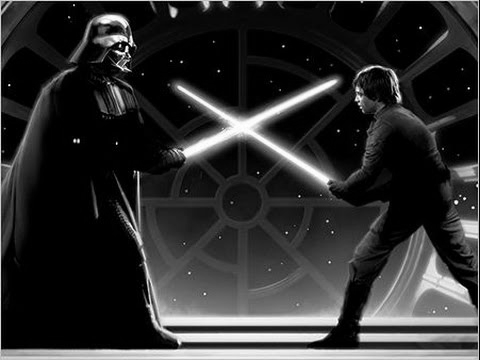

In [19]:
IMAGE_PATH = os.path.join(os.getcwd(), '..', 'raw_data', 'star_wars', 'star-wars-saber.jpg')
bw_image = Image.open(IMAGE_PATH).convert('L')
display(bw_image)
bw_octaves = octave_creator(bw_image, up_samples=None)

In [20]:
def difference_of_gaussian(octave_levels):
    def sub_pixels(upper_img_data, lower_img_data):
        return np.array([u-l for u, l in zip(upper_img_data, lower_img_data)])
    
    return [
        [ sub_pixels(o[i], o[i+1]) for i in range(len(o)-1)]
        for o in octave_levels
    ]

In [21]:
bw_image_dog = difference_of_gaussian(bw_octaves)

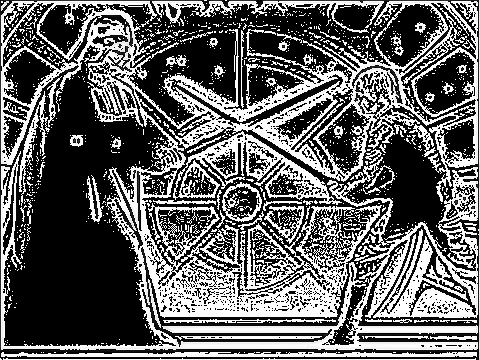

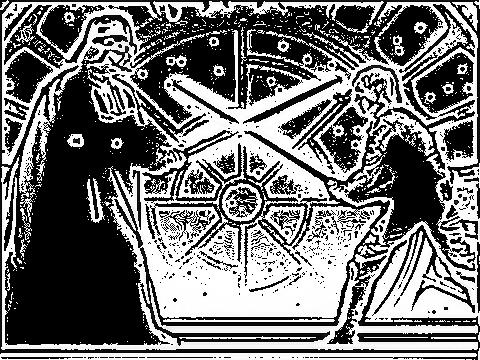

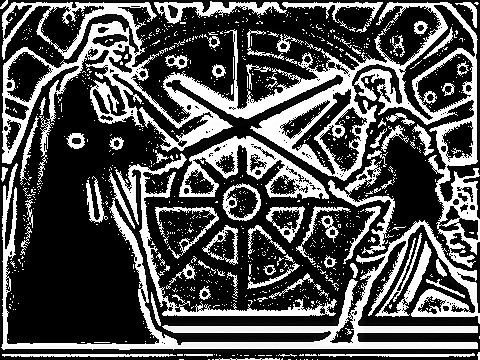

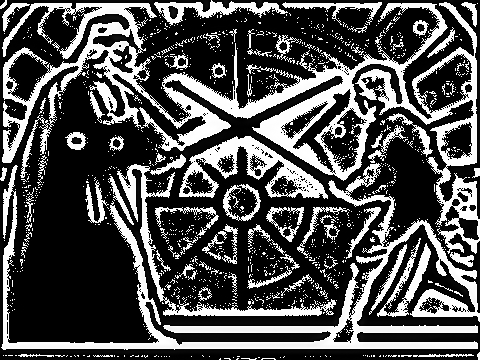

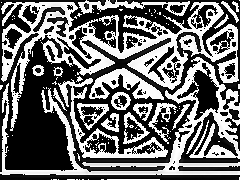

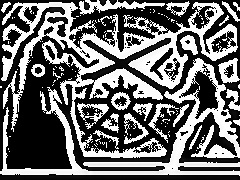

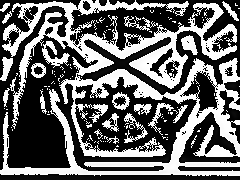

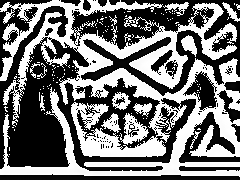

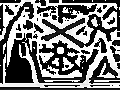

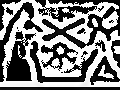

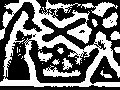

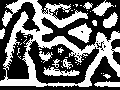

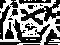

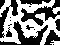

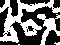

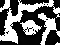

In [22]:
images_level = convert_octave_opencv_levels_to_pillow(bw_image_dog)
for l in images_level:
    for i in l:
        display(i)

Great, with that simple operation we now have the Difference of Gaussian data for our image octaves.  But
what does this mean exactly, from the AI shack write-up on SIFT it states that the generated
images are...  
> ... an approximation of scale invariant laplacian of gaussian ...

This is useful for the fact that we can now start to detect keypoints in our images.  

**NOTE:** There is one very important thing to call out, you will always be one count shorter on the images from
the blur level because we are combining two.  This means if we have 5 blur levels we will have exactly 4 DoG comparisons.
The reason this is important comes in the next section where we describe how to extract keypoints from the
DoG results.  

## References

* [AI Shack - SIFT](http://aishack.in/tutorials/sift-scale-invariant-feature-transform-scale-space/)
* [(Whitepaper) - Distinctive Image Features from Scale-Invariant Keypoints](http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf) 